# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [2]:
from swatmf_pkgs import swatmf_viz
import itertools

In [13]:
wd = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\scn_models"
sub_number = 240
start_date = '1/1/2020'
obd_nam = '240'
scn_df = swatmf_viz.all_strs(wd, sub_number, start_date, obd_nam, time_step='M')


Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenar

In [10]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6],
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)

df = df_rch.loc[sub_number]
df = df[df["filter"] < 13]
df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
df.rename(columns = {'streamflow_sim':'base_{}'.format(sub_number)}, inplace = True)
df

,filter,base_240
2003-01-31,1.0,342.90
2003-02-28,2.0,474.00
2003-03-31,3.0,499.30
2003-04-30,4.0,428.20
2003-05-31,5.0,416.50
...,...,...
2019-08-31,8.0,112.10
2019-09-30,9.0,88.16
2019-10-31,10.0,73.11
2019-11-30,11.0,102.60


In [17]:
base_df = df.drop('filter', axis=1)
cbase_df = base_df['1/1/2019':'12/31/2019']



In [14]:
scn_df

,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240,bau_ssp245-inm-cm5-0_sub_240,bau_ssp245-miroc6_sub_240,...,bau_ssp585-noresm2-lm_sub_240,bau_ssp585-ukesm1-0-ll_sub_240,rd_ssp245-inm-cm5-0_sub_240,rd_ssp245-miroc6_sub_240,rd_ssp245-noresm2-lm_sub_240,rd_ssp245-ukesm1-0-ll_sub_240,rd_ssp585-inm-cm5-0_sub_240,rd_ssp585-miroc6_sub_240,rd_ssp585-noresm2-lm_sub_240,rd_ssp585-ukesm1-0-ll_sub_240
2020-01-31,224.60,175.70,157.40,183.10,163.10,180.20,146.80,220.20,218.70,173.50,...,140.40,213.90,220.30,174.20,155.00,180.40,160.00,177.90,142.60,215.50
2020-02-29,356.80,309.10,312.30,358.10,243.60,395.90,332.20,338.40,355.20,306.70,...,332.40,331.50,354.50,307.70,314.50,356.30,243.70,393.70,331.80,333.60
2020-03-31,394.50,442.80,405.70,393.90,565.10,526.70,677.50,292.50,387.50,432.30,...,675.90,276.70,393.50,439.90,405.90,394.20,567.70,522.60,677.80,287.10
2020-04-30,415.60,398.10,391.80,313.10,489.10,314.30,382.80,390.70,409.20,393.30,...,373.80,386.60,414.80,397.50,390.30,307.50,487.50,309.50,381.00,390.80
2020-05-31,342.10,392.90,254.60,151.50,347.10,254.30,211.70,306.70,324.20,386.20,...,190.60,285.90,336.70,391.60,247.90,147.10,342.90,247.80,205.10,301.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050-08-31,106.60,96.39,108.90,82.24,117.50,84.60,91.79,96.28,99.90,86.73,...,83.00,86.99,102.40,89.27,101.70,75.68,114.10,77.78,84.72,89.06
2050-09-30,73.90,67.66,79.32,46.11,93.95,50.33,62.78,61.55,65.59,61.69,...,56.77,55.26,68.02,63.09,72.69,44.50,86.91,48.73,58.92,57.46
2050-10-31,46.36,76.94,60.81,33.58,87.18,27.59,51.89,27.78,42.63,65.25,...,45.14,26.38,45.65,68.58,55.41,31.83,79.74,27.60,47.72,27.68
2050-11-30,81.52,74.73,91.61,61.61,97.29,74.84,109.90,71.60,69.04,66.68,...,94.16,53.57,71.00,68.26,83.09,54.47,89.32,65.01,99.98,59.65


In [15]:
scn_df = scn_df.iloc[:, :8]
scn_df

,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240
2020-01-31,224.60,175.70,157.40,183.10,163.10,180.20,146.80,220.20
2020-02-29,356.80,309.10,312.30,358.10,243.60,395.90,332.20,338.40
2020-03-31,394.50,442.80,405.70,393.90,565.10,526.70,677.50,292.50
2020-04-30,415.60,398.10,391.80,313.10,489.10,314.30,382.80,390.70
2020-05-31,342.10,392.90,254.60,151.50,347.10,254.30,211.70,306.70
...,...,...,...,...,...,...,...,...
2050-08-31,106.60,96.39,108.90,82.24,117.50,84.60,91.79,96.28
2050-09-30,73.90,67.66,79.32,46.11,93.95,50.33,62.78,61.55
2050-10-31,46.36,76.94,60.81,33.58,87.18,27.59,51.89,27.78
2050-11-30,81.52,74.73,91.61,61.61,97.29,74.84,109.90,71.60


In [16]:
s245_min = scn_df.iloc[:, :4].min(axis = 1)
s245_max = scn_df.iloc[:, :4].max(axis = 1)
s585_min = scn_df.iloc[:, 4:].min(axis = 1)
s585_max = scn_df.iloc[:, 4:].max(axis = 1)


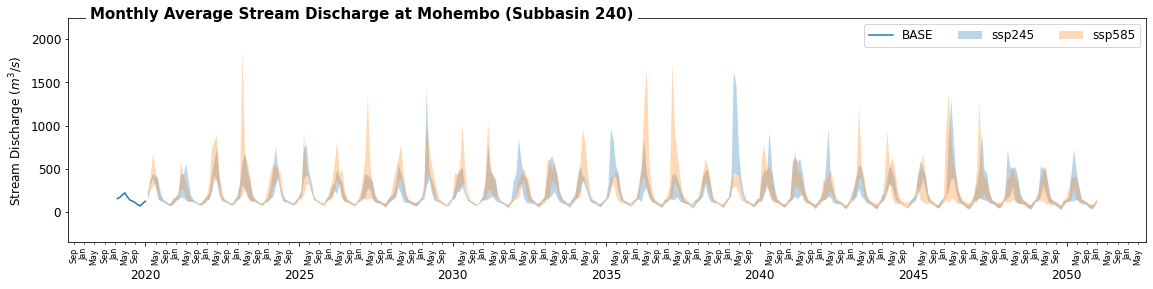

In [31]:
f, ax = plt.subplots(figsize=(16, 4))
# marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
# for i in range(len(scn_df.columns)):
#     ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])
ax.fill_between(scn_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(cbase_df.index, cbase_df, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()


years = mdates.YearLocator(5)
months = mdates.MonthLocator(interval=4)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label


ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.margins(y=0.2)
ax.set_title(
    'Monthly Average Stream Discharge at Mohembo (Subbasin 240)',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
ax.set_ylabel(r'Stream Discharge $(m^3/s)$', fontsize = 12)
f.tight_layout()
plt.savefig(os.path.join(wd, 'projected_str_mohembo.png'), dpi=300, bbox_inches="tight")
plt.show()

# Get monthly group

In [43]:
mbase_df = pd.DataFrame()
for i in range(1, 13):
    df = base_df[base_df.index.month == i]
    index = [x for x in range(2003, 2020)]
    df.index=index

    df.rename(columns = {'base_240':'{}'.format(i)}, inplace = True)
    mbase_df = pd.concat(
        [mbase_df, df], axis=1,
        # ignore_index=True
        sort=False
        )


mbase_df

C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,1,2,3,4,5,6,7,8,9,10,11,12
2003,342.9,474.0,499.3,428.2,416.5,297.2,236.3,202.0,164.90,157.70,212.0,266.4
2004,430.8,576.7,629.7,557.8,454.9,295.3,226.9,187.7,154.30,153.80,182.1,235.2
2005,285.0,429.4,419.4,487.3,383.7,243.8,191.8,159.1,142.10,125.20,160.7,196.1
2006,321.8,503.7,450.1,454.0,408.6,273.4,202.8,165.0,145.20,153.60,184.7,242.3
2007,367.4,422.8,427.7,457.1,314.4,197.9,163.4,147.4,131.80,124.60,158.7,201.2
2008,268.7,790.5,557.6,474.0,348.0,219.3,174.5,149.5,136.60,125.40,188.7,244.4
2009,290.5,524.3,816.3,578.1,337.0,211.9,182.9,152.4,138.80,149.40,162.2,206.3
2010,320.1,456.3,468.2,634.6,464.7,267.2,178.9,144.6,129.60,110.60,148.3,216.2
2011,375.8,511.2,735.1,637.7,500.2,322.7,202.9,150.9,131.60,125.30,159.4,269.3
2012,366.4,428.5,469.5,499.2,342.3,214.9,173.5,150.4,135.80,137.70,162.0,230.1


In [50]:
np.arange(0, 12, 0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5])

In [52]:
base_x = [x-0.5 for x in range(1, 13)]
base_x

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]

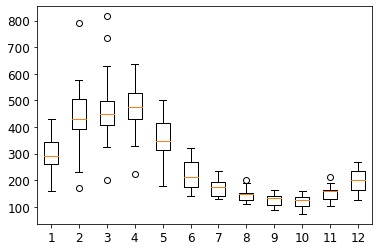

In [54]:
f, ax = plt.subplots()
ax.boxplot(mbase_df.values)
ax.tick_params(axis='both', labelsize=12)
plt.show()

In [55]:
s245_min

2020-01-31    157.40
2020-02-29    309.10
2020-03-31    393.90
2020-04-30    313.10
2020-05-31    151.50
               ...  
2050-08-31     82.24
2050-09-30     46.11
2050-10-31     33.58
2050-11-30     61.61
2050-12-31    113.90
Length: 372, dtype: float64

In [65]:
s245_min_df = pd.DataFrame()
for i in range(1, 13):
    df = s245_min[s245_min.index.month == i]
    index = [x for x in range(2020, 2051)]
    df.index=index

    df.name = i
    s245_min_df = pd.concat(
        [s245_min_df, df], axis=1,
        # ignore_index=True
        sort=False
        )


s245_min_df

,1,2,3,4,5,6,7,8,9,10,11,12
2020,157.4,309.1,393.9,313.1,151.5,128.40,115.70,97.32,76.20,65.23,86.56,134.5
2021,140.3,170.8,161.3,131.8,118.1,117.60,114.50,98.68,79.38,81.72,102.10,137.9
2022,142.3,231.5,431.4,353.9,192.2,124.80,119.10,105.10,85.31,76.10,88.48,134.6
2023,158.2,317.1,263.2,187.3,138.4,125.40,118.80,102.70,88.80,76.58,110.30,113.3
2024,154.8,171.2,298.2,385.6,199.6,122.00,111.70,103.40,90.39,76.67,94.44,151.4
2025,168.6,369.0,434.7,400.4,240.2,141.10,128.60,110.10,88.71,86.27,123.30,152.1
2026,172.2,249.1,207.6,339.0,170.8,120.90,118.60,104.70,82.55,70.41,107.50,122.8
2027,140.4,167.1,275.4,256.8,138.9,109.40,102.00,96.67,76.19,60.74,103.70,119.3
2028,145.5,160.3,285.7,212.2,120.0,107.90,104.50,91.01,72.45,70.86,89.50,133.4
2029,145.4,287.9,375.6,225.0,135.0,120.80,112.00,96.37,76.96,62.49,82.44,139.3


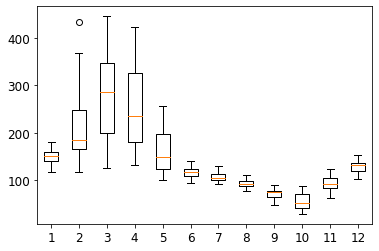

In [66]:
f, ax = plt.subplots()
ax.boxplot(s245_min_df.values)
ax.tick_params(axis='both', labelsize=12)
plt.show()

In [63]:
s245_min

2020-01-31    157.40
2020-02-29    309.10
2020-03-31    393.90
2020-04-30    313.10
2020-05-31    151.50
               ...  
2050-08-31     82.24
2050-09-30     46.11
2050-10-31     33.58
2050-11-30     61.61
2050-12-31    113.90
Length: 372, dtype: float64

In [67]:
base_df

,base_240
2003-01-31,342.90
2003-02-28,474.00
2003-03-31,499.30
2003-04-30,428.20
2003-05-31,416.50
...,...
2019-08-31,112.10
2019-09-30,88.16
2019-10-31,73.11
2019-11-30,102.60


In [68]:
scn_df

,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240
2020-01-31,224.60,175.70,157.40,183.10,163.10,180.20,146.80,220.20
2020-02-29,356.80,309.10,312.30,358.10,243.60,395.90,332.20,338.40
2020-03-31,394.50,442.80,405.70,393.90,565.10,526.70,677.50,292.50
2020-04-30,415.60,398.10,391.80,313.10,489.10,314.30,382.80,390.70
2020-05-31,342.10,392.90,254.60,151.50,347.10,254.30,211.70,306.70
...,...,...,...,...,...,...,...,...
2050-08-31,106.60,96.39,108.90,82.24,117.50,84.60,91.79,96.28
2050-09-30,73.90,67.66,79.32,46.11,93.95,50.33,62.78,61.55
2050-10-31,46.36,76.94,60.81,33.58,87.18,27.59,51.89,27.78
2050-11-30,81.52,74.73,91.61,61.61,97.29,74.84,109.90,71.60


In [69]:
tot_df = pd.concat([base_df, scn_df], axis=1)

In [70]:
tot_df

,base_240,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240
2003-01-31,342.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,499.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-30,428.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-31,416.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2050-08-31,NaN,106.60,96.39,108.90,82.24,117.50,84.60,91.79,96.28
2050-09-30,NaN,73.90,67.66,79.32,46.11,93.95,50.33,62.78,61.55
2050-10-31,NaN,46.36,76.94,60.81,33.58,87.18,27.59,51.89,27.78
2050-11-30,NaN,81.52,74.73,91.61,61.61,97.29,74.84,109.90,71.60


In [92]:
xlabels = ['BASE']+[x[5:-8] for x in tot_df.columns[1:]]
xlabels

['BASE',
 'ssp245-inm-cm5-0',
 'ssp245-miroc6',
 'ssp245-noresm2-lm',
 'ssp245-ukesm1-0-ll',
 'ssp585-inm-cm5-0',
 'ssp585-miroc6',
 'ssp585-noresm2-lm',
 'ssp585-ukesm1-0-ll']

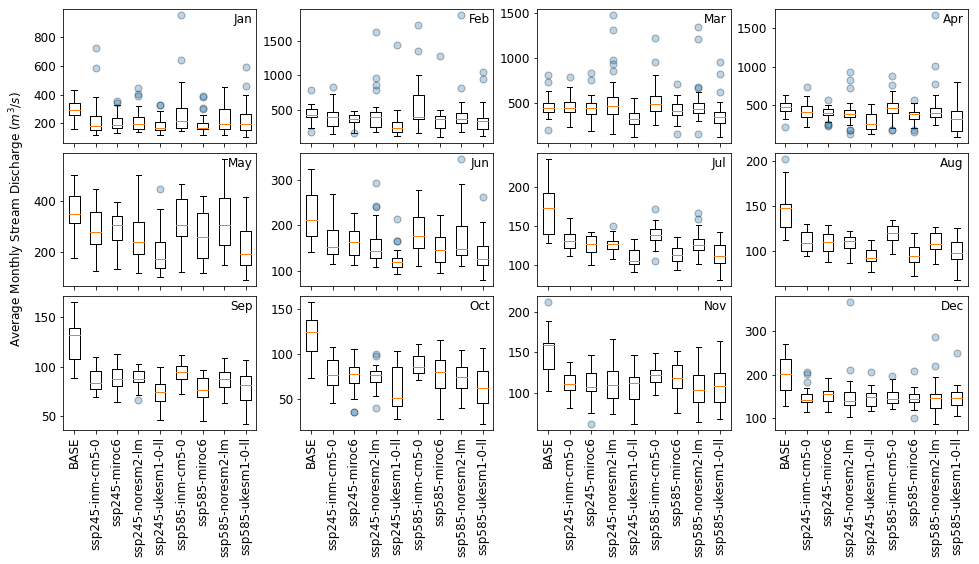

In [108]:
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(14,8), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    data = [df_m[i].dropna() for i in df_m.columns]
    # df_m = df_m.dropna(ax)
    
    ax.boxplot(data, flierprops=flierprops)
    
    
    # ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    # ax.set_xticklabels(df_m.keys(), rotation=90)
    ax.set_xticklabels(xlabels, rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='right',
        x=0.98,
        y=0.85,
        fontsize=12
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Stream Discharge $(m^3/s)$', fontsize=12, labelpad=20)
plt.tight_layout()
plt.savefig(os.path.join(wd, 'projected_mstr.png'), dpi=300, bbox_inches="tight")
plt.show()

In [107]:
wd

'D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\scn_models'